In [1]:
import pandas as pd

customers = pd.read_csv("../dataset/customers.csv")
products = pd.read_csv("../dataset/products.csv")
orders = pd.read_csv("../dataset/orders.csv")


In [2]:
customers.head()

,customer_id,customer_name,city,state
0,1,Aarav,Chennai,TN
1,2,Meera,Bengaluru,KA
2,3,Rahul,Hyderabad,TS
3,4,Priya,Mumbai,MH
4,5,Karthik,Coimbatore,TN


In [3]:
products.head()

,product_id,product_name,category,price,stock_quantity
0,101,Wireless Mouse,Electronics,799,120
1,102,Keyboard,Electronics,999,80
2,103,Notebook,Stationery,199,200
3,104,Water Bottle,Accessories,349,60
4,105,Backpack,Accessories,1499,40


In [4]:
orders.head()

,order_id,customer_id,product_id,order_date,quantity,total_amount
0,1001,1,101,2024-01-10,2,1598
1,1002,2,103,2024-01-12,5,995
2,1003,3,102,2024-01-15,1,999
3,1004,4,105,2024-01-18,1,1499
4,1005,5,104,2024-01-20,3,1047


In [5]:
customers.head()

,customer_id,customer_name,city,state
0,1,Aarav,Chennai,TN
1,2,Meera,Bengaluru,KA
2,3,Rahul,Hyderabad,TS
3,4,Priya,Mumbai,MH
4,5,Karthik,Coimbatore,TN


In [6]:
products.head()

,product_id,product_name,category,price,stock_quantity
0,101,Wireless Mouse,Electronics,799,120
1,102,Keyboard,Electronics,999,80
2,103,Notebook,Stationery,199,200
3,104,Water Bottle,Accessories,349,60
4,105,Backpack,Accessories,1499,40


In [7]:
orders.head()

,order_id,customer_id,product_id,order_date,quantity,total_amount
0,1001,1,101,2024-01-10,2,1598
1,1002,2,103,2024-01-12,5,995
2,1003,3,102,2024-01-15,1,999
3,1004,4,105,2024-01-18,1,1499
4,1005,5,104,2024-01-20,3,1047


In [8]:
customers.info()

<class 'pandas.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   customer_id    5 non-null      int64
 1   customer_name  5 non-null      str  
 2   city           5 non-null      str  
 3   state          5 non-null      str  
dtypes: int64(1), str(3)
memory usage: 292.0 bytes


In [9]:
products.info()

<class 'pandas.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   product_id      5 non-null      int64
 1   product_name    5 non-null      str  
 2   category        5 non-null      str  
 3   price           5 non-null      int64
 4   stock_quantity  5 non-null      int64
dtypes: int64(3), str(2)
memory usage: 332.0 bytes


In [10]:
orders.info()

<class 'pandas.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   order_id      5 non-null      int64
 1   customer_id   5 non-null      int64
 2   product_id    5 non-null      int64
 3   order_date    5 non-null      str  
 4   quantity      5 non-null      int64
 5   total_amount  5 non-null      int64
dtypes: int64(5), str(1)
memory usage: 372.0 bytes


In [11]:
customers['state'].value_counts()

state
TN    2
KA    1
TS    1
MH    1
Name: count, dtype: int64

In [12]:
products['category'].value_counts()

category
Electronics    2
Accessories    2
Stationery     1
Name: count, dtype: int64

In [13]:
orders.shape

(5, 6)

In [14]:
orders_products = orders.merge(
    products,
    on="product_id",
    how="left"
)

orders_products.head()


,order_id,customer_id,product_id,order_date,quantity,total_amount,product_name,category,price,stock_quantity
0,1001,1,101,2024-01-10,2,1598,Wireless Mouse,Electronics,799,120
1,1002,2,103,2024-01-12,5,995,Notebook,Stationery,199,200
2,1003,3,102,2024-01-15,1,999,Keyboard,Electronics,999,80
3,1004,4,105,2024-01-18,1,1499,Backpack,Accessories,1499,40
4,1005,5,104,2024-01-20,3,1047,Water Bottle,Accessories,349,60


In [15]:
final_df = orders_products.merge(
    customers,
    on="customer_id",
    how="left"
)

final_df.head()


,order_id,customer_id,product_id,order_date,quantity,total_amount,product_name,category,price,stock_quantity,customer_name,city,state
0,1001,1,101,2024-01-10,2,1598,Wireless Mouse,Electronics,799,120,Aarav,Chennai,TN
1,1002,2,103,2024-01-12,5,995,Notebook,Stationery,199,200,Meera,Bengaluru,KA
2,1003,3,102,2024-01-15,1,999,Keyboard,Electronics,999,80,Rahul,Hyderabad,TS
3,1004,4,105,2024-01-18,1,1499,Backpack,Accessories,1499,40,Priya,Mumbai,MH
4,1005,5,104,2024-01-20,3,1047,Water Bottle,Accessories,349,60,Karthik,Coimbatore,TN


In [16]:
final_df['calculated_revenue'] = final_df['price'] * final_df['quantity']

final_df[['order_id', 'product_name', 'quantity', 'price', 'calculated_revenue']].head()


,order_id,product_name,quantity,price,calculated_revenue
0,1001,Wireless Mouse,2,799,1598
1,1002,Notebook,5,199,995
2,1003,Keyboard,1,999,999
3,1004,Backpack,1,1499,1499
4,1005,Water Bottle,3,349,1047


In [17]:
total_revenue = final_df['calculated_revenue'].sum()
total_revenue


np.int64(6138)

In [19]:
top_products = (
    final_df
    .groupby('product_name')['calculated_revenue']
    .sum()
    .sort_values(ascending=False)
)

top_products

product_name
Wireless Mouse    1598
Backpack          1499
Water Bottle      1047
Keyboard           999
Notebook           995
Name: calculated_revenue, dtype: int64

In [20]:
top_categories = (
    final_df
    .groupby('category')['calculated_revenue']
    .sum()
    .sort_values(ascending=False)
)

top_categories

category
Electronics    2597
Accessories    2546
Stationery      995
Name: calculated_revenue, dtype: int64

In [21]:
top_customers = (
    final_df
    .groupby('customer_name')['calculated_revenue']
    .sum()
    .sort_values(ascending=False)
)

top_customers


customer_name
Aarav      1598
Priya      1499
Karthik    1047
Rahul       999
Meera       995
Name: calculated_revenue, dtype: int64

In [22]:
state_revenue = (
    final_df
    .groupby('state')['calculated_revenue']
    .sum()
    .sort_values(ascending=False)
)

state_revenue


state
TN    2645
MH    1499
TS     999
KA     995
Name: calculated_revenue, dtype: int64

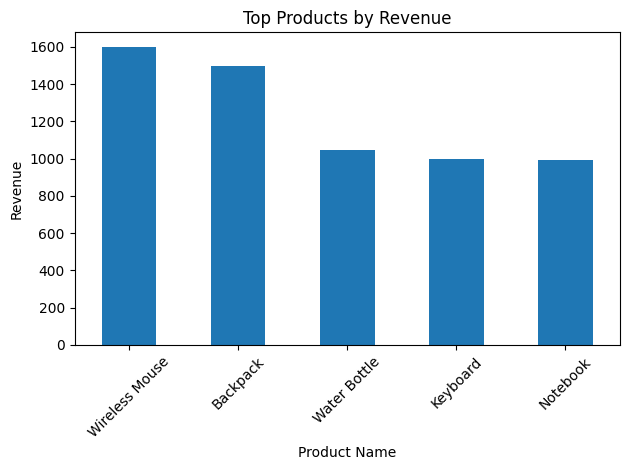

In [23]:
import matplotlib.pyplot as plt

top_products.plot(kind='bar')
plt.title("Top Products by Revenue")
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [3]:
final_df.to_csv("../final_ecommerce_sales.csv", index=False)

NameError: name 'final_df' is not defined

In [4]:
orders_products = orders.merge(
    products,
    on="product_id",
    how="left"
)

NameError: name 'orders' is not defined

In [1]:
import pandas as pd

customers = pd.read_csv("../dataset/customers.csv")
products = pd.read_csv("../dataset/products.csv")
orders = pd.read_csv("../dataset/orders.csv")

In [2]:
orders_products = orders.merge(
    products,
    on="product_id",
    how="left"
)

In [3]:
final_df = orders_products.merge(
    customers,
    on="customer_id",
    how="left"
)

In [4]:
final_df.to_csv("../final_ecommerce_sales.csv", index=False)
